In [1]:
# load libraries

import os
import os
import numpy as np
import tifffile as tiff

In [ ]:
# Paths to input and output directories
input_dir = './../../../../data/Human_squamous_cell_carcinoma_stained_with_SignalStar_mIHC_technology/test/'
output_file = './../../../../data/Human_squamous_cell_carcinoma_stained_with_SignalStar_mIHC_technology/numpy_stacked_output.tif'

In [40]:
# Stack the images with numpy

# Make list of all files with a ".tif" extension in the input directory
input_files = [os.path.join(input_dir, file) for file in os.listdir(input_dir) if file.endswith('.tif')]
# Sort the list of files alphabetically
input_files = sorted(input_files)

# Load the first image to determine the shape
first_img = np.asarray(tiff.imread(input_files[0]))

# Number of tiles (one file per tile)
num_tiles = len(input_files)
# Number of channels in each tile (assumed to be the same for all tiles)
num_channels = first_img.shape[0]

# Initialize an empty numpy array to hold all images
# Shape: (Tiles, Channels, Z, Y, X)
stack_shape = (num_tiles, num_channels, first_img.shape[1], first_img.shape[2])
stacked_image = np.empty(stack_shape, dtype=first_img.dtype)

# Loop through each file and stack the images
for idx, file in enumerate(input_files):
    img = np.asarray(tiff.imread(file))
    stacked_image[idx] = img

# Save the stacked image as a TIFF file
tiff.imsave(output_file, stacked_image)

print(f"Stacked image saved to {output_file}")


Stacked image saved to ./../../../../data/Human_squamous_cell_carcinoma_stained_with_SignalStar_mIHC_technology/numpy_stacked_output.tif


/var/folders/79/cjwcycvd2_9dyfffbym60x200000gn/T/ipykernel_44301/2789077634.py:31: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(output_file, stacked_image)


In [41]:
#Check float 32 range
print(img.dtype)
print(img.min(), img.max())

float32
0.0 100.886406


In [42]:
#rescale float32 to uint16 with scikit image:
numpy_stacked_tif = './../../../../data/Human_squamous_cell_carcinoma_stained_with_SignalStar_mIHC_technology/numpy_stacked_output.tif'
from skimage import util

# Read the float TIFF
img = tiff.imread(numpy_stacked_tif)
# Assuming img is your image data

# Normalize to [0, 1]
img_normalized = img / img.max()

# Convert to uint16
img_uint16 = util.img_as_uint(img_normalized)

# Save the converted image
#io.imsave('./output_uint16.tif', img_uint16)
# Save the converted image
tiff.imwrite('./../../../../data/Human_squamous_cell_carcinoma_stained_with_SignalStar_mIHC_technology/numpy_stacked_output_uint16.tif', img_uint16)

In [43]:
# check that scaling wennt correctly
print(img_uint16.dtype)
print(img_uint16.min(), img_uint16.max())

uint16
0 65535


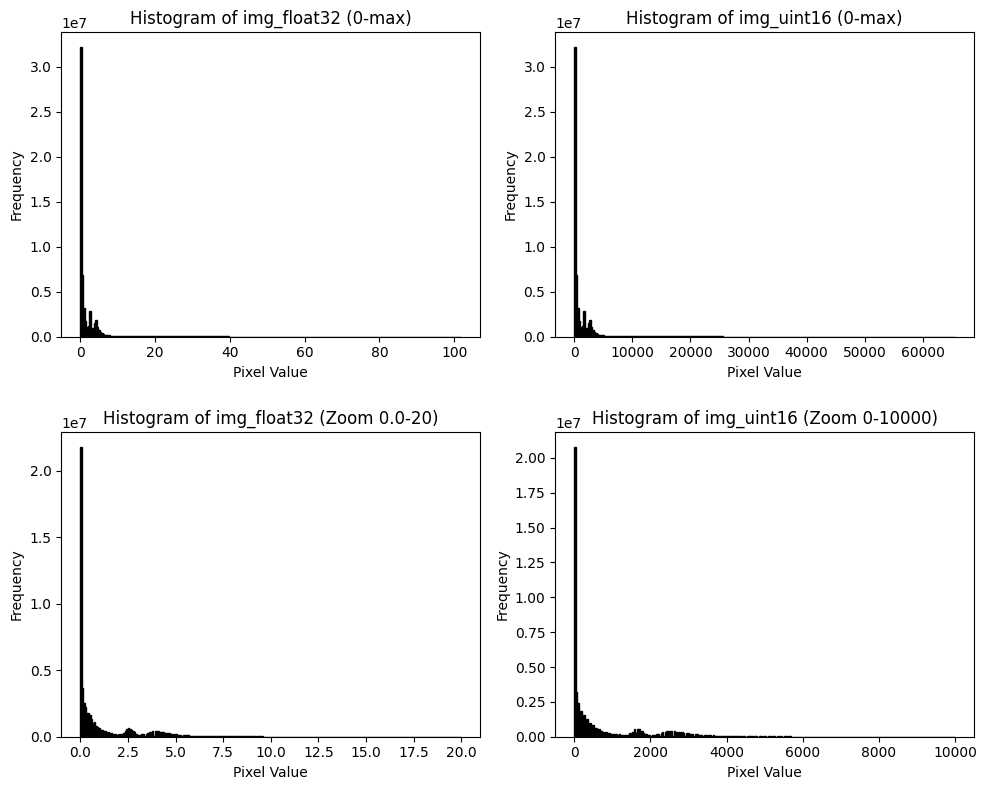

In [48]:
# Plot histograms for boat images, zoom in on the range [0, 20] for the float32 image and [0, 10000] for the uint16 image 
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1
axs[0, 0].hist(img.ravel(), bins=256, fc='k', ec='k')
axs[0, 0].set_title('Histogram of img_float32 (0-max)')
axs[0, 0].set_xlabel('Pixel Value')
axs[0, 0].set_ylabel('Frequency')

# Plot 2
axs[0, 1].hist(img_uint16.ravel(), bins=256, fc='k', ec='k')
axs[0, 1].set_title('Histogram of img_uint16 (0-max)')
axs[0, 1].set_xlabel('Pixel Value')
axs[0, 1].set_ylabel('Frequency')

# Plot 3
axs[1, 0].hist(img.ravel(), bins=256, range=(0.0, 20), fc='k', ec='k')
axs[1, 0].set_title('Histogram of img_float32 (Zoom 0.0-20)')
axs[1, 0].set_xlabel('Pixel Value')
axs[1, 0].set_ylabel('Frequency')

# Plot 4
axs[1, 1].hist(img_uint16.ravel(), bins=256, range=(0, 10000), fc='k', ec='k')
axs[1, 1].set_title('Histogram of img_uint16 (Zoom 0-10000)')
axs[1, 1].set_xlabel('Pixel Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display all plots
plt.show()